In [1]:
from plotting_rho import *
from bayesian import *

### 1. Convex Function in 1D

In [2]:
# Example
b = np.random.normal(0, 1, 100)
a = np.random.normal(0, 2, 100)
opt_alpha = bayesian_optimization(method = 'samples', a = a, b = b, p =50, max_eval = 100, as_dict = False)[1]

100%|██████████| 100/100 [00:08<00:00, 11.58trial/s, best loss: -0.798120047837539]


In [3]:
rho_hist, rho_samples = get_opt_rho_1D(opt_alpha, 1000)

#### 1.1 Plotting Derivative

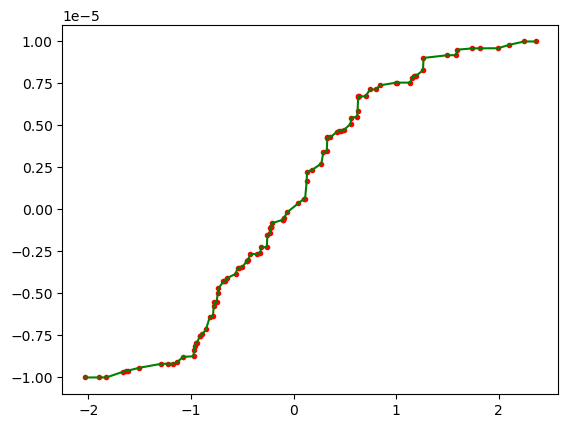

In [4]:
f = int_function(b,rho_samples,plot=True)

#### 1.2 Plotting Convex Function

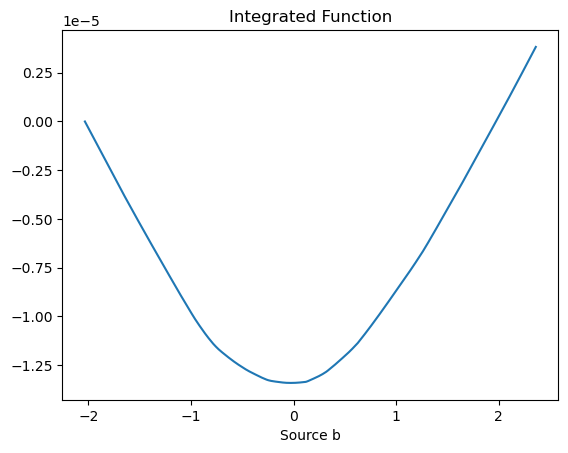

In [5]:
plot_int_function_smooth(b,rho_samples)

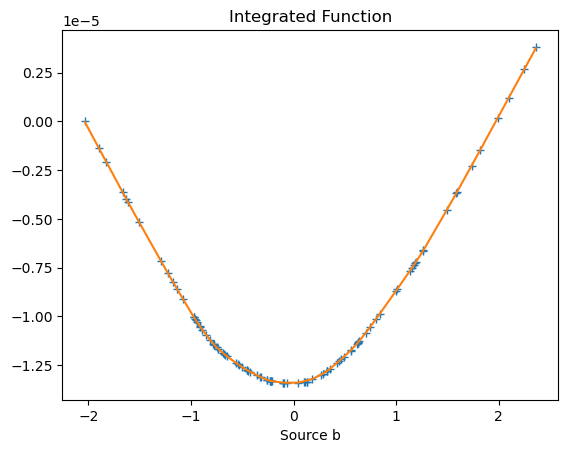

In [6]:
plot_int_function_lowess(b,rho_samples)

### 2. Convex Function in 2D

In [7]:
# source_a size is size_a
size_a = 100
# source_b size is size_b
size_b = 100
# target_size for rho is target_size
target_size = 100

# source_b samples
mu_b = np.array([0, 0])
cov_b = np.array([[1, 0], [0, 1]])
b_samples = ot.datasets.make_2D_samples_gauss(size_b, mu_b, cov_b)
mu_a = np.array([0, 0])
cov_a = np.array([[2, 0], [0, 2]])
a_samples = ot.datasets.make_2D_samples_gauss(size_a, mu_a, cov_a)

a = np.array(a_samples).reshape(100,2)
b = np.array(b_samples).reshape(100,2)

result = bayesian_optimization('samples', a, b, a_grid = np.arange(100, dtype=np.float64), b_grid = np.arange(100, dtype=np.float64), plot = False, p=50, target_size = 100, lbd = 1, ubd = 101, algo = tpe.suggest, max_eval = 100, as_dict = False)
opt_alpha = result[1]

100%|██████████| 100/100 [05:09<00:00,  3.10s/trial, best loss: -0.3836573450283369]


In [8]:
rho_hist, rho_samples = get_opt_rho_multiD(opt_alpha,2,100)

#### 2.1 Plotting Derivatives

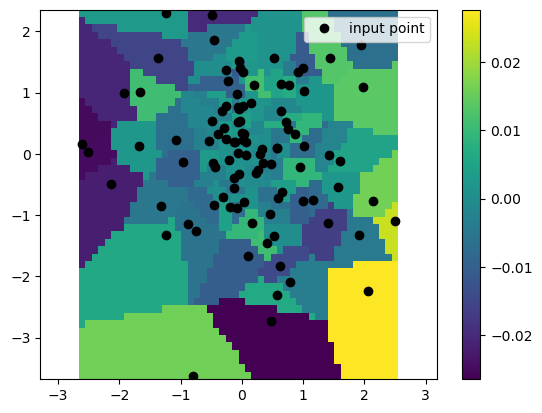

In [9]:
plot_2D_integrad(b, rho_samples, method = "Nearest")

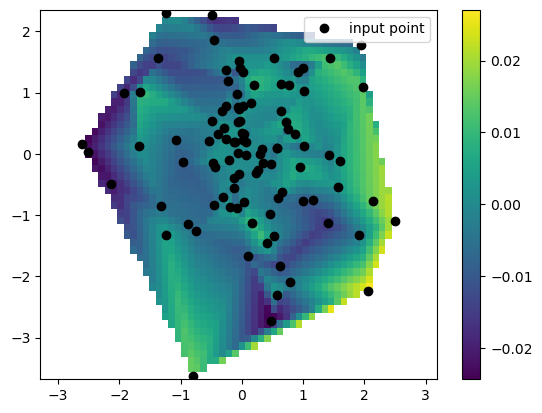

In [10]:
plot_2D_integrad(b, rho_samples, method = "Linear")

#### 2.2 Plotting Convex Function

In [11]:
%matplotlib widget

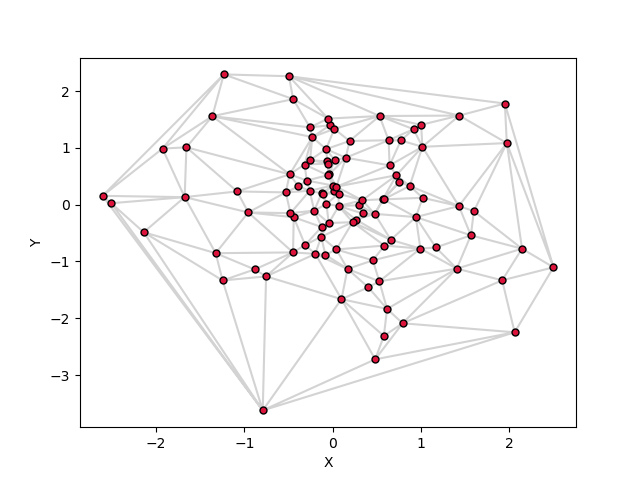

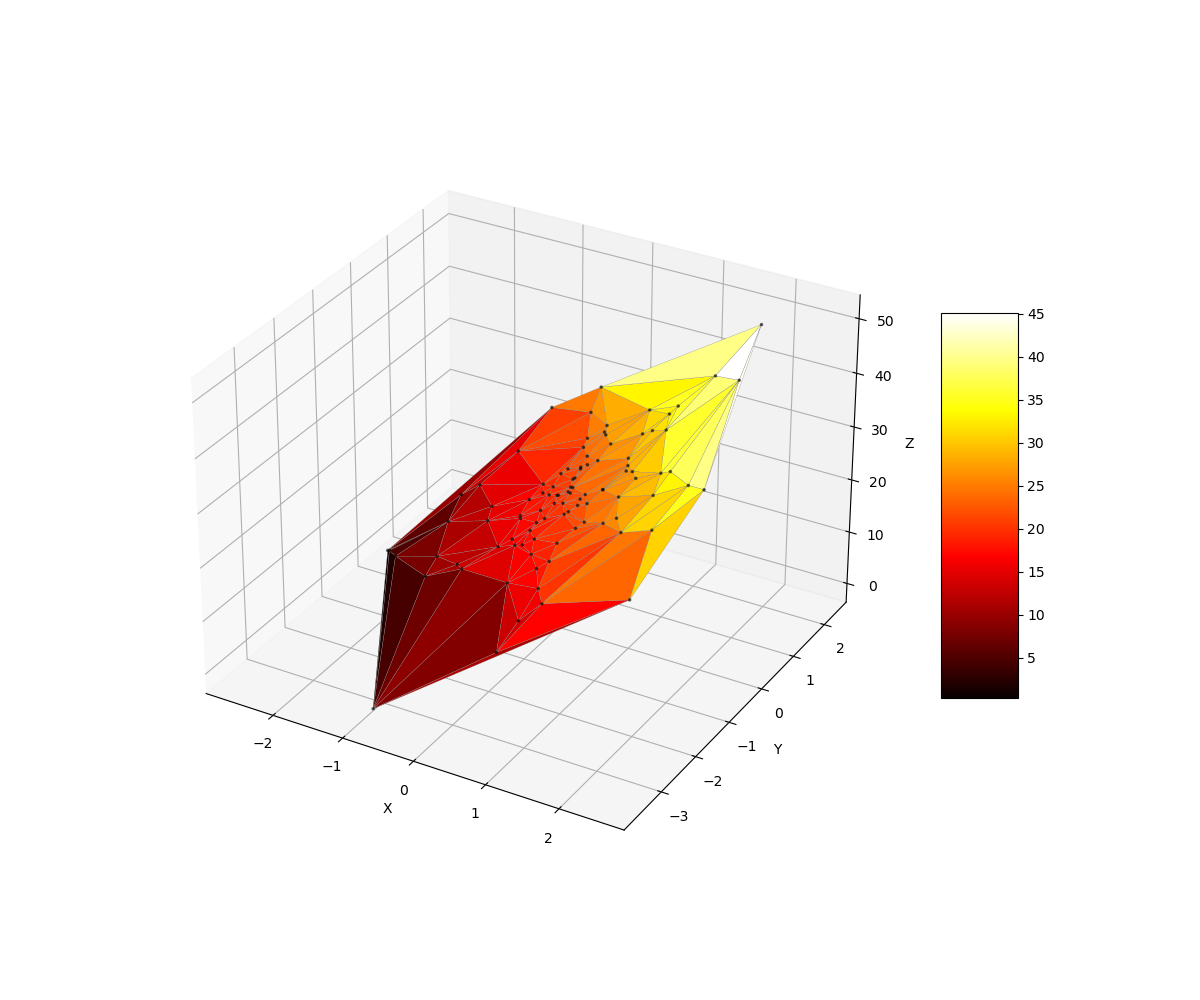

In [12]:
plot_int_bivariatefFunction_trisurf(b,rho_samples)

In [14]:
# test
rho_rv = np.array([[1,2],[3,4]])
b = np.array([[1,1],[1,2],[2,3]])
rho_rv = np.array(rho_rv)
b_size = len(b)
rho_rv_size = len(rho_rv)
    
x2 = np.ones((rho_rv_size,)) / rho_rv_size
x3 = np.ones((b_size,)) / b_size
    
Mb = ot.dist(np.array(b).reshape((b_size, 2)), rho_rv.reshape((rho_rv_size, 2)))
Gb = ot.emd(x3, x2, Mb) # transport matrix
    
Gb

array([[0.33333333, 0.        ],
       [0.16666667, 0.16666667],
       [0.        , 0.33333333]])

In [15]:
# calculate the average across rho
    
rho_mean = []
for i in range(b_size):
    rho_mean.append(np.dot(Gb[i]/sum(Gb[i]),rho_rv))
        
rho_mean = np.array(rho_mean)

In [16]:
rho_mean

array([[1., 2.],
       [2., 3.],
       [3., 4.]])